In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
ciudades ={
    11001: 'Bogotá', 76001: 'Cali', 5001: 'Medellín', 66001: 'Pereira', 13001: 'Cartagena', 
    50001: 'Villavicencio', 8001: 'Barranquilla', 68001: 'Bucaramanga', 23001: 'Monteria', 
    73001: 'Ibague', 54001: 'Cucuta', 17001: 'Manizales', 52001: 'Pasto'
}
df_datos = pd.read_csv('Datos de la vivienda.CSV', sep=';')
df_datos = df_datos.drop(['P1987','P1988','P1989','P1990','FEX_C','ORDEN','SECUENCIA_ENCUESTA','SECUENCIA_P','NRO_ENCUESTA'], axis=1)
df_ciudades = df_datos[df_datos['DEPMUNI'].isin(ciudades.keys())]
df_ciudades['DEPMUNI'] = df_ciudades['DEPMUNI'].map(ciudades)
df_ciudades.rename(columns={'P1988S1':'Estrato'}, inplace=True)
df_ciudades 

C:\Users\PC\AppData\Local\Temp\ipykernel_14980\2131829953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudades['DEPMUNI'] = df_ciudades['DEPMUNI'].map(ciudades)
C:\Users\PC\AppData\Local\Temp\ipykernel_14980\2131829953.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudades.rename(columns={'P1988S1':'Estrato'}, inplace=True)


,DIRECTORIO,DEPMUNI,CIUDADES28,Clase,Estrato
38,600038,Villavicencio,1,Cabecera,3.0
39,600039,Villavicencio,1,Cabecera,3.0
40,600040,Villavicencio,1,Cabecera,1.0
41,600041,Villavicencio,1,Cabecera,2.0
42,600042,Villavicencio,1,Cabecera,1.0
...,...,...,...,...,...
41281,646818,Manizales,1,Cabecera,2.0
41282,646819,Manizales,1,Cabecera,3.0
41283,646820,Manizales,1,Cabecera,3.0
41284,646827,Manizales,1,Cabecera,2.0


In [213]:
(41286-29371)/41286

0.28859661870852105

In [214]:
df_encuesta = pd.read_csv('Percepcion de seguridad y convivencia.CSV', sep=';')
df_encuesta = df_encuesta.drop(['FEX_C','ORDEN','SECUENCIA_ENCUESTA','SECUENCIA_P','NRO_ENCUESTA'], axis=1)
df_encuesta

,DIRECTORIO,P3105,P1361S1,P1361S15,P1361S14,P1361S2,P1361S16,P1361S3,P1361S4,P1361S5,...,P3316S10,P3316S11,P3316S12,P3316S13,P3503S1,P3503S2,P3503S3,P3503S4,P3503S5,P3503S6
0,600000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,5,5,5,5,5
1,600000,3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,5,5,3,5,5,5
2,600001,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,4,4,4,4,4
3,600002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,5,5,3,4,5,5
4,600002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95383,646820,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,5,5,9,5,5
95384,646827,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,4,4,4,4,4
95385,646827,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,3,3,3,3,3,3
95386,646828,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,4,4,5,5,5


In [215]:
df_merge = df_encuesta.copy()
df_merge['DEPMUNI'] = df_datos['DEPMUNI'].map(ciudades)
df_merge['Estrato'] = df_ciudades['Estrato']
print(df_merge['DEPMUNI'].isna().sum())
print((66017/95388)*100 )

66017
69.20891516752631


In [216]:
df_filtrado = df_merge[df_merge['DEPMUNI'].notna()]
reemplazo_p3105 = {
    1: 'Muy Seguro(a)',
    2: 'Seguro(a)',
    3: 'Inseguro(a)',
    4: 'Muy Inseguro(a)'
}

df_filtrado['P3105'] = df_filtrado['P3105'].replace(reemplazo_p3105)
na= df_filtrado.columns[df_filtrado.isna().sum()>1]
print(len(na)),print(len(df_filtrado))
na

80
29371


C:\Users\PC\AppData\Local\Temp\ipykernel_14980\231637575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['P3105'] = df_filtrado['P3105'].replace(reemplazo_p3105)


Index(['P1361S1', 'P1361S15', 'P1361S14', 'P1361S2', 'P1361S16', 'P1361S3',
       'P1361S4', 'P1361S5', 'P1361S6', 'P1361S7', 'P1361S11', 'P1361S8',
       'P1361S9', 'P1361S10', 'P1361S12', 'P1361S13', 'P1358S1', 'P1358S14',
       'P1358S13', 'P1358S2', 'P1358S15', 'P1358S3', 'P1358S4', 'P1358S5',
       'P1358S6', 'P1358S7', 'P1358S12', 'P1358S8', 'P1358S9', 'P1358S11',
       'P1358S10', 'P3109S1', 'P3109S2', 'P3109S3', 'P3109S4', 'P3109S5',
       'P3109S6', 'P3109S7', 'P3109S16', 'P3109S17', 'P3109S9', 'P3109S10',
       'P3109S11', 'P3109S12', 'P3109S13', 'P3109S18', 'P3109S14', 'P3109S15',
       'P3111S5', 'P3111S6', 'P3111S7', 'P3112S1', 'P3112S2', 'P3112S3',
       'P3112S4', 'P3112S5', 'P3112S6', 'P3112S7', 'P3112S8', 'P3112S9',
       'P3112S10', 'P3112S11', 'P3112S12', 'P3112S13', 'P3112S14', 'P3112S15',
       'P3316S1', 'P3316S2', 'P3316S3', 'P3316S4', 'P3316S5', 'P3316S6',
       'P3316S7', 'P3316S8', 'P3316S9', 'P3316S10', 'P3316S11', 'P3316S12',
       'P3316S13', '

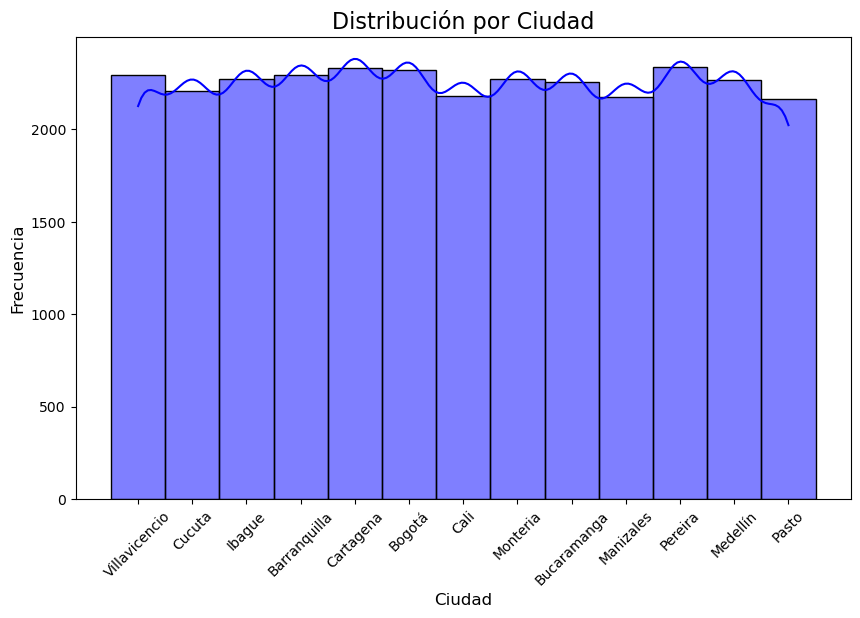

In [217]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.histplot(df_filtrado['DEPMUNI'], kde=True, color='blue', bins=20)  # Puedes ajustar el número de bins

plt.title('Distribución por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.show()


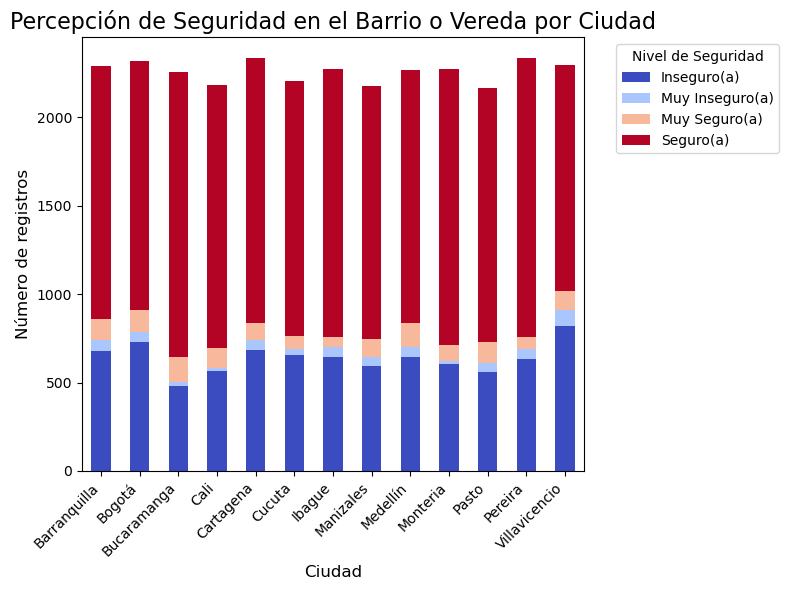

In [218]:
conteo_ciudades_p3105 = df_filtrado.groupby(['DEPMUNI', 'P3105']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
conteo_ciudades_p3105.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

# Agregar título y etiquetas
plt.title('Percepción de Seguridad en el Barrio o Vereda por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de registros', fontsize=12)

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel de Seguridad', bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar el gráfico
plt.tight_layout()  # Ajusta el gráfico para que no se recorten las etiquetas
plt.show()



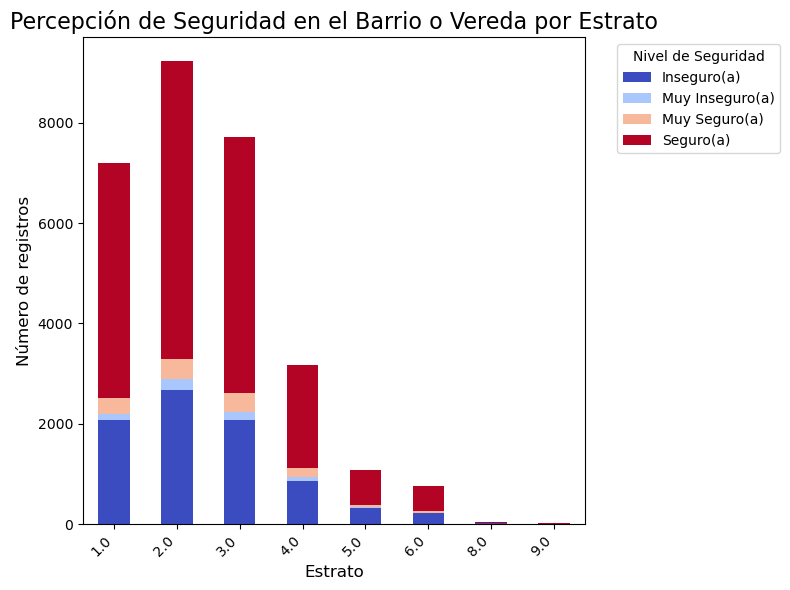

In [221]:
conteo_ciudades_estrato = df_filtrado.groupby(['Estrato', 'P3105']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
conteo_ciudades_estrato.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

# Agregar título y etiquetas
plt.title('Percepción de Seguridad en el Barrio o Vereda por Estrato', fontsize=16)
plt.xlabel('Estrato', fontsize=12)
plt.ylabel('Número de registros', fontsize=12)

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel de Seguridad', bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar el gráfico
plt.tight_layout()  # Ajusta el gráfico para que no se recorten las etiquetas
plt.show()